<a href="https://colab.research.google.com/github/aps1070-2019/All_Labs_Answers/blob/master/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### PCA - Project 3

Project 3 is structured a bit differently than Projects 1 and 2 - here, all the code for the tutorial part is given. You're encouraged to read closely, adjust and experiment to make sure you fully understand what the code is doing. Once you have a firm grasp of PCA, you should be in great shape for the exercises at the end. Note that all 12.5 marks for this project are attributed to the exercises. The tutorial is not marked.

Please fill out the following:


*   Your **name**: Guan Qi 
*   Your **student number**:1006622264



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. Complete exercises.


## Principle Component Analysis - Introduction

### Principle Component Analysis

As you get deeper in the world of data science, you'll learn that in practice it's very uncommon to work with datasets that are 2 or 3 dimensional, and so can be plotted directly. We're now going to look at _dimensionality reduction_ : a category of unsupervised algorithms which attempt to collapse high-dimensional datasets into a low-dimensional space.

As suggested above, one reason to do this is to aid visualization. However, that's far from the only reason dimensionality reduction is useful! These techniques also allow us to filter noise, extract useful features, and accomplish much more.

Let's dive into PCA with the Iris dataset.

### PCA - Overview

1. Standardize the data.


2. Obtain the Eigenvectors and Eigenvalues from the Covariance matrix (or Correlation matrix), or perform Singular Vector Decomposition.


3. Sort eigenvalues in descending order and choose the 𝑘 eigenvectors that correspond to the 𝑘 largest eigenvalues where 𝑘 is the number of dimensions of the new feature subspace. 𝑘 is less than original dimensionality.


4. Construct the projection matrix 𝐖 from the selected 𝑘 eigenvectors.


5. Transform the original dataset 𝐗 via 𝐖 to obtain a 𝑘-dimensional feature subspace 𝐘.

## PCA - Iris dataset

What's that flower?

### Intro

For the following tutorial, we will be working with the famous "Iris" dataset that has been deposited on the UCI machine learning repository
(https://archive.ics.uci.edu/ml/datasets/Iris).

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset are:
1. Iris-setosa (n=50)
1. Iris-versicolor (n=50)
1. Iris-virginica (n=50)

And the four features of in Iris dataset are:
1. sepal length in cm
1. sepal width in cm
1. petal length in cm
1. petal width in cm

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [70]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
#print(y)

In [72]:
labels = set(y)
labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

### Exploratory Data Analysis

Let's explore a bit.

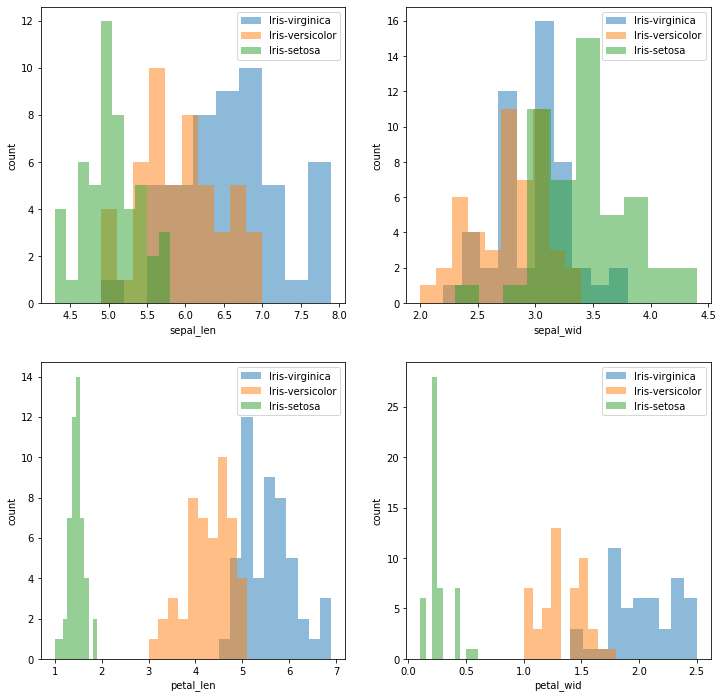

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
noOfCols = X.shape[1]

# iterate over each column (feature), and plot in separate sub-plot.
for col in range(noOfCols):
    # plot data for different labels for choosen column (feature).
    for label in labels:
        axes.flat[col].hist(X[y==label, col], alpha=0.5, label=label)
        
    axes.flat[col].legend(loc='upper right')
    axes.flat[col].set(xlabel=df.columns[col], ylabel='count')

As one can see, no feature can on it's own predict the class of the flower.

### Standardizing Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. 

Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [0]:
X_std = StandardScaler().fit_transform(X)

In [75]:
X[:, 0].mean(), X_std[:, 0].mean()

(5.843333333333334, -4.736951571734001e-16)

In [76]:
X[:, 0].var(), X_std[:, 0].var()

(0.6811222222222223, 1.0)

### Eigendecomposition - Computing Eigenvectors and Eigenvalues

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

Methods to perform PCA:
1. The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a 𝑑×𝑑 matrix where each element represents the covariance between two features.
2. But, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency.

#### Using Covariance Matrix

In [77]:
n, m = X_std.shape

# Compute covariance matrix
C = np.dot(X_std.T, X_std) / (n-1) 
# or C = np.cov(X_std.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
eigenVectors, eigenValues

(array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]),
 array([2.93035378, 0.92740362, 0.14834223, 0.02074601]))

#### Using Singular Vector Decomposition

In [78]:
eigenVectors, s, v = np.linalg.svd(X_std.T)
eigenVectors
#print(s) [20.89551896 11.75513248  4.7013819   1.75816839]


array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [79]:
n, m = X_std.shape
#print(n) 150
eigenValues = s**2/(n-1)
eigenValues

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

Are the eigenVectors and the eigenValues returned by both the methods the same?

#### Sort based on eigenValues

Decreasing order of eigenValues.
It was not needed in this case as eigenValues were already in decreasing order.

In [0]:
args = (-eigenValues).argsort()
#print(args) [0 1 2 3]
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

### Explained Variance

In [81]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
#print(expVar) [72.77045209380134, 23.030523267680643, 3.6838319576273975, 0.5151926808906315]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

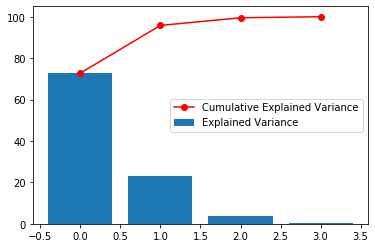

In [82]:
plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

How many eigenValues are needed to explain more than 95% of variance?

### Projections

Since only 2 eigenVectors are enough to explain more than 95% of variance, we'll create the projection matrix using the first 2 eigenVectors.

In [83]:
COUNT = 2
W = eigenVectors[:, 0:COUNT]
W

array([[-0.52237162, -0.37231836],
       [ 0.26335492, -0.92555649],
       [-0.58125401, -0.02109478],
       [-0.56561105, -0.06541577]])

In [84]:
projX = np.dot(X_std, W)
X.shape, projX.shape

((150, 4), (150, 2))

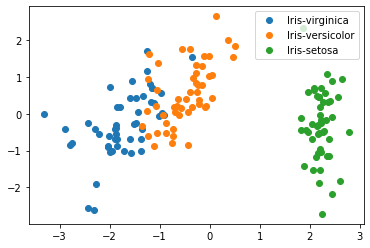

In [85]:
for label in labels:
    plt.plot(projX[y==label, 0], projX[y==label, 1], 'o', label=label)
    plt.legend(loc='upper right')

What has PCA helped us achieve here?

1. Visualization: easier visualization of all 3 classes
2. Classification: a flower of unknown class can be plotted here, and then classified visually or using algorithms (such as KNNs) 

We have used PCA on numerical data. But can it used on Image data?

## Eigenfaces

Let's face the Eigen.

### Intro

**Eigenfaces** is the name given to a set of **eigenvectors** when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification.

Eigenfaces refers to an appearance-based approach to face recognition that seeks to capture the variation in a collection of face images and use this information to encode and compare images of individual faces in a holistic (as opposed to a parts-based or feature-based) manner. 

The motivation of Eigenfaces is twofold:

1. Extract the relevant facial information, which may or may not be directly related to human intuition of face features such as the eyes, nose, and lips. One way to do so is to capture the statistical variation between face images.
2. Represent face images efficiently. To reduce the computation and space complexity, each face image can be represented using a small number of parameters.

Images are downloaded from [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/).

In [86]:
!pip install wget

In [0]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import wget
import math

In [88]:
# Download and unzip dataset.
filename = wget.download('https://github.com/aps1070-2019/datasets/raw/master/lfw-a.tgz', 'lfw-a.tgz')
!tar -xvzf "{filename}"

lfw/Aaron_Eckhart/
lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
lfw/Aaron_Guiel/
lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg
lfw/Aaron_Patterson/
lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg
lfw/Aaron_Peirsol/
lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
lfw/Aaron_Pena/
lfw/Aaron_Pena/Aaron_Pena_0001.jpg
lfw/Aaron_Sorkin/
lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
lfw/Aaron_Tippin/
lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg
lfw/Abba_Eban/
lfw/Abba_Eban/Abba_Eban_0001.jpg
lfw/Abbas_Kiarostami/
lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
lfw/Abdel_Aziz_Al-Hakim/
lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
lfw/Abdel_Madi_Shabneh/
lfw/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
lfw/Abdel_Nasser_Assidi/
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg
lfw/Abdoulaye_Wade/
lfw/Abdoulay

In [0]:
# constants
IMAGE_DIR = 'lfw'
DEFAULT_SIZE = [250, 250] 

In [0]:
# Reads images from filesystem and returns Array of images and imageNames.
def readImages(imagePath = IMAGE_DIR, defaultSize = DEFAULT_SIZE):
    images = []
    imageNames = []
    imageDirs = [image for image in os.listdir(imagePath) if not image.startswith('.')]

    for imageDir in imageDirs:
        dirPath = os.path.join(imagePath, imageDir)
        dirImageNames = [image for image in os.listdir(dirPath) if not image.startswith('.')]
        
        for imageName in dirImageNames:
            image = Image.open(os.path.join(dirPath, imageName))
            image = image.convert ("L") # L stands for Luminance: converts image to grayscale
            
            if (defaultSize is not None):
                image = image.resize(defaultSize, Image.ANTIALIAS) # resize image
                
            images.append(np.asarray(image, dtype = np.uint8))
            imageNames.append(imageDir)
    return [images, imageNames]

In [0]:
[X, y] = readImages()
#print(X)

In [92]:
type(X), len(X)

(list, 1054)

In [93]:
type(X[0]), X[0].shape
#print(X)

(numpy.ndarray, (250, 250))

In [94]:
type(y), len(y)

(list, 1054)

### Exploratory Data Analysis

Check from dataset if this image has correct label.

Image name is:  Adrien_Brody


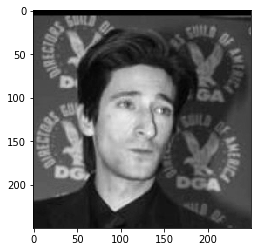

In [95]:
print('Image name is: ', y[2])
plt.imshow(X[2], cmap=plt.cm.gray)
plt.show()

Creating a mean face from all dataset faces.

In [0]:
def asRowMatrix(X):
    if len(X) == 0: return np.array([])
    rowMatrix = np.empty((0, X[0].size), dtype = X[0].dtype)
    for img in X:
        rowMatrix = np.vstack((rowMatrix, np.asarray(img).reshape(1, -1)))
    return rowMatrix

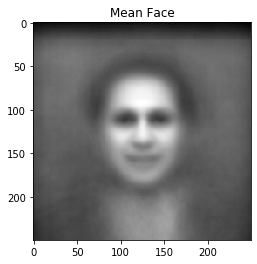

In [97]:
XMat = asRowMatrix(X);
meanImage = np.reshape(XMat.mean(axis=0), X[0].shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()


In [98]:
print(XMat.shape,type(XMat))

(1054, 62500) <class 'numpy.ndarray'>


### Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Using Covariance Matrix

In [0]:
def getBasisCountThatPreservesVariance(eigenValues, variance=.95):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx
        
def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    print(n,d,mu,mu.shape)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T, X) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X, X.T) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

Below image explains the PCA code above:

<img src='https://github.com/aps1070-2019/datasets/raw/master/img/eig-decom.png' />

In [100]:
eigenValues, eigenVectors, mean = pca(XMat, y)

1054 62500 [58.38614801 58.73814042 59.13282732 ... 77.14705882 76.47912713
 75.80550285] (62500,)
Number of useful eigenBasis are:  298


In [0]:
# Above code in pca method is written because below code is computationally time taking.
# C = np.dot(XMat.T, XMat) # covariance matrix
# eigenValues, eigenVectors = np.linalg.eigh(C)

#### EigenFaces

**What were dimensions of eigenVector in the case of Iris example?**

Array of size = number of features (4 in the case of Iris).
Array of size 4.

**What will be dimensions of eigenVector in this example?**

Array of size = feature size (62500). 

In [102]:
eigenVectors[:, 0].shape

(62500,)

If the dimensions of eigenVector is same as the vectorised image.

What if eigenVector is displayed in image format.

This is called **eigenFace.**

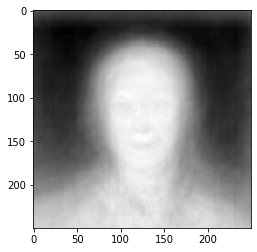

In [103]:
# show the first eigenFace
plt.imshow(eigenVectors[:, 0].reshape(-1, 250), cmap = plt.cm.gray)

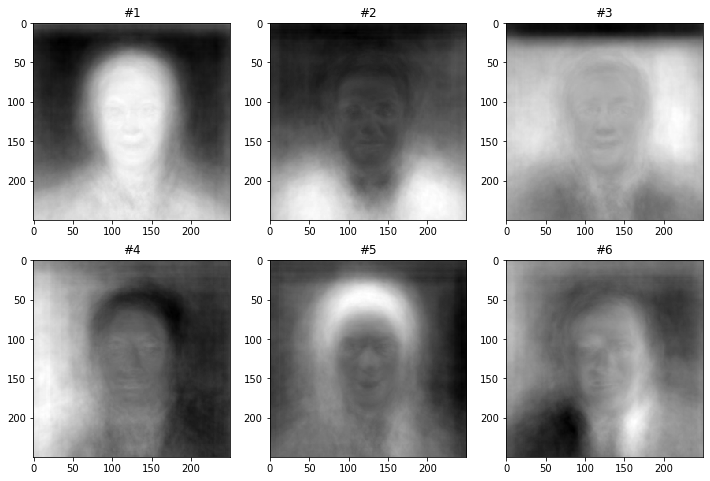

In [104]:
# print first 6 eigen faces
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 250), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By only using first few eigenFaces:
1. How would you get a face with white hair.
2. Answer the same for black hair.

Have a good look at eigenFace number 5.

Good luck sleeping tonight.

1. **Plot the next 6 eigenFaces.**
2. **Do you observe any difference observed between the first 6 and second 6.**

### Projections

Now, we will reconstruct an image from the dataset using eigenFaces (eigenVectors).

In [0]:
IMAGE_IDX = 10 # image idx in dataset

In [0]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [0]:
# create reconstructed images
COUNT = 20 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

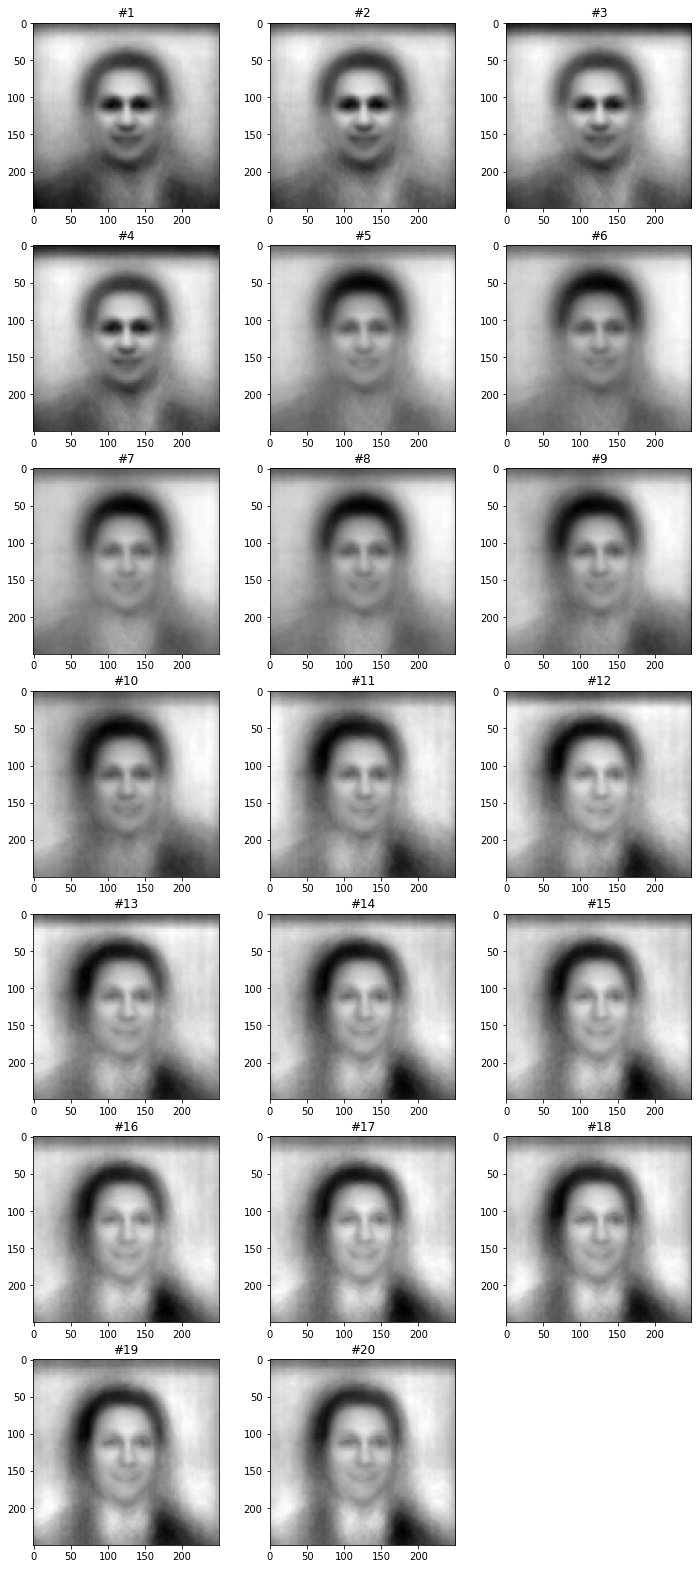

In [108]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [0]:
# create reconstructed images
numEvsSet = [100, 200, 298] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)

reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors[:, 0:numEvs], X[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

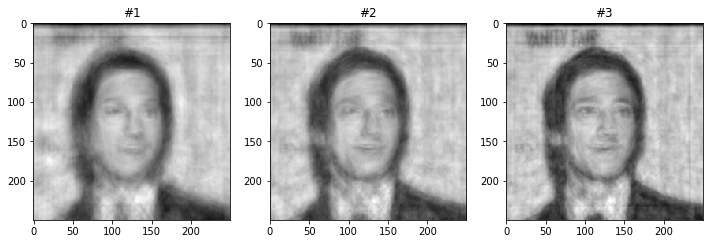

In [110]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i], cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

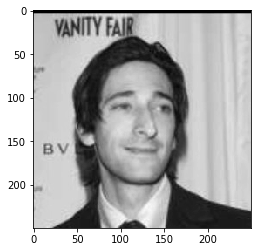

In [111]:
# actual image
plt.imshow(X[IMAGE_IDX], cmap=plt.cm.gray)
plt.show()

Can you identify the person after 298 eigenVector reconstruction?

### Facial Recognition (Optional)

**How a new point would be classified on the IRIS dataset after PCA.**

1. Projecting all training samples into the PCA subspace.
2. Projecting the query image into the PCA subspace.
3. Finding the nearest neighbor (one algorithm to accomplish this) between the projected training images and the projected query image. 

**How would a new face be classified (facial recognition) after PCA.**



**FunFact: EigenFaces is still often considered as a baseline comparison method to demonstrate the minimum expected performance of a facial recognition system.**

## Time Series Data - Exercises

The clock is ticking.

The dataset is of Tuberculosis prevalence over various countries between the given time period.

Data url: 'https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv'.

Answer the below questions.

You are free to do the below analysis over other time-series datasets of your interest (eg: financial stock data, etc.), provided the dataset has at least 15 columns (time points / features) and at least 100 rows (data points).

### Question 1

In [112]:
#%reset -f
import pandas as pd 
df=pd.read_csv('https://raw.githubusercontent.com/aps1070-2019/datasets/master/tb-data.csv',thousands=',')


df_data=df.iloc[:,1:]
df_std = StandardScaler().fit_transform(df_data)

column_names=list(df_data.columns)
#print(column_names)
#df_data
print(df_std.shape)
#df.describe


(207, 18)


1. Display 30 random samples of the original time series data in a 10 x 3 (3 plots each in 10 rows) graph format.[1]  **Shown below**
2. Do you see any recurring patterns (ie oscillations, monotonic increase or decrease, other trends)?[0.5]
   **I haven't seen any obvious pattern from theses graphs before doing PCA. Becasue some contries do have a increasing trend, some are decreasing, and some of them appear to have oscillations in TB prevalence.**

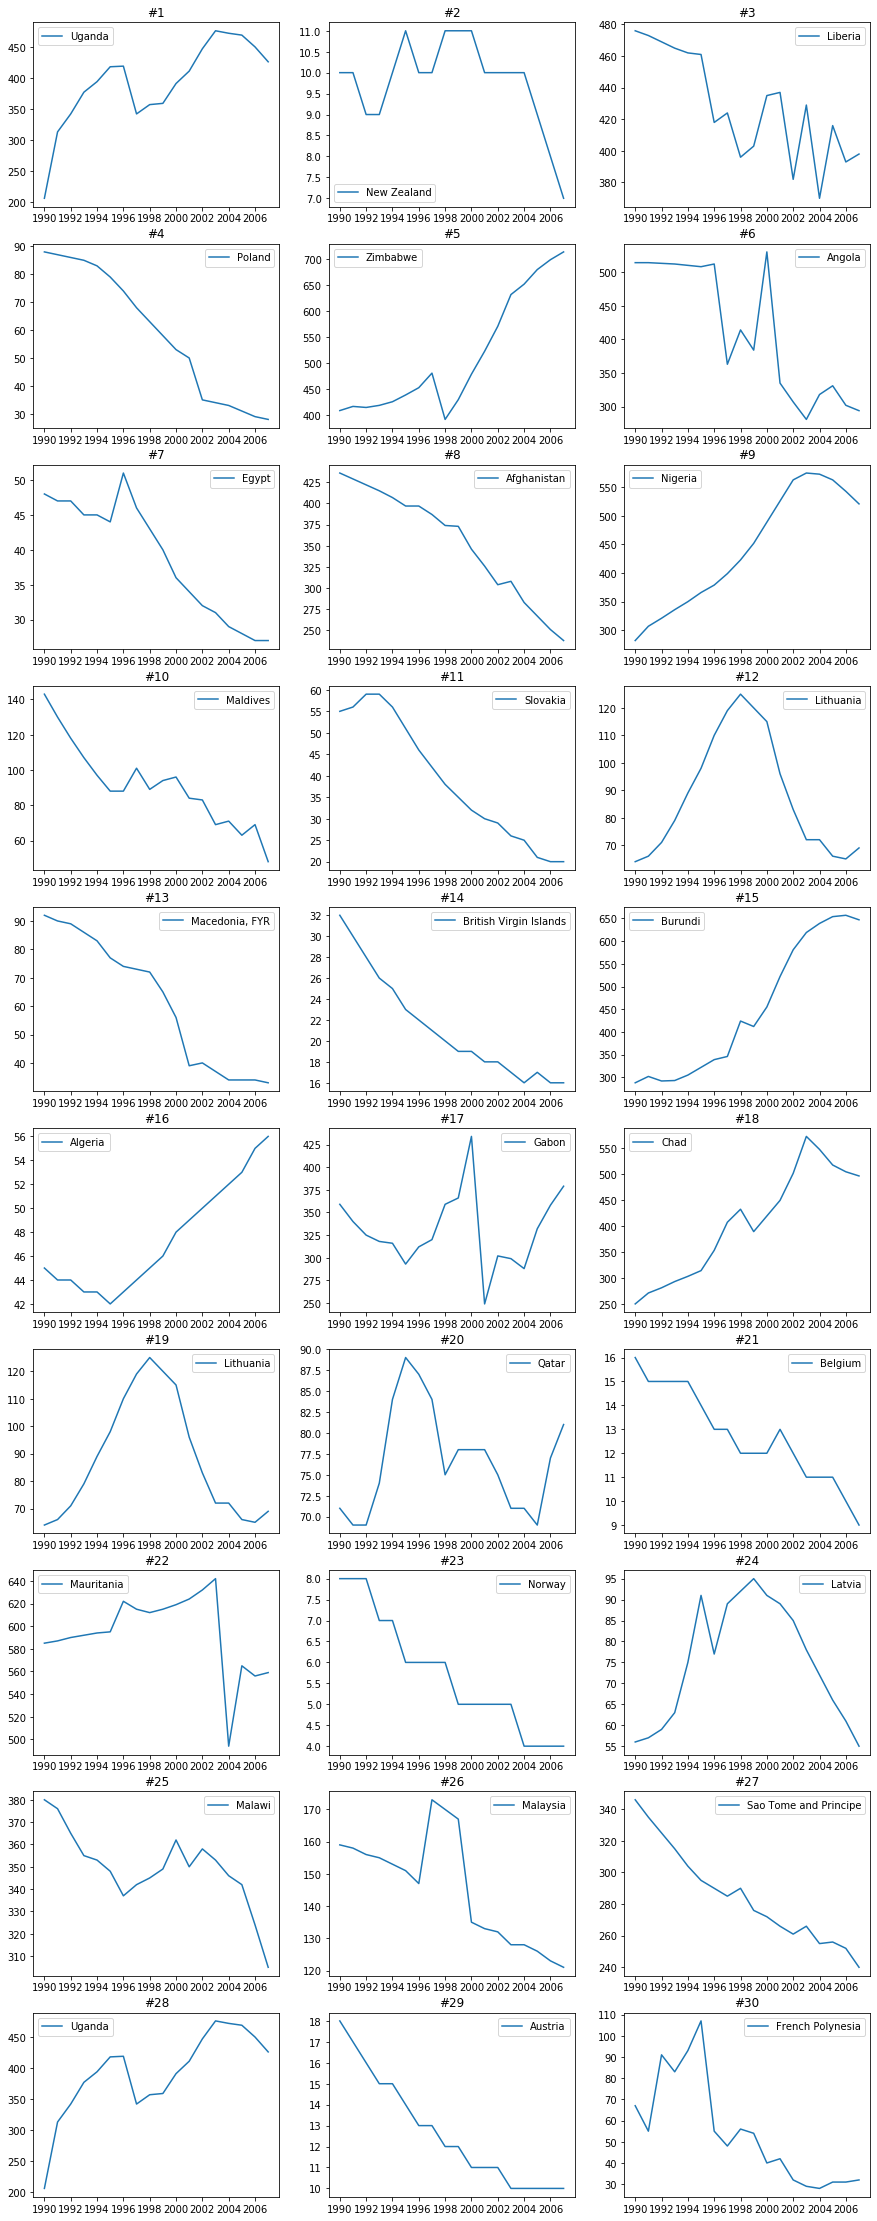

In [113]:
import matplotlib.pyplot as plt

COUNT = 30
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(15, 40))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    rand=np.random.randint(0,207)
    df_country=df.iloc[:,0][rand]
    time=np.asarray(column_names).astype(int)
    #pop=np.asarray((df_std[rand]).astype(int))
    #pop=df_std[rand]
    pop=df_data.iloc[rand,:]

    #print(time)
    plt.plot(time,pop, label=df_country)
    plt.legend()
    plt.xticks(np.arange(min(time), max(time)+1, 2.0))
    plt.show       
    plt.title('#{}'.format(i+1))
#if i in range(30)

#print(rand) 



I haven't seen any obvious pattern 

### Question 2

1. Show the first 6 principle components plotted as a time series (in a 3 plots/row format).[1]  **Shown below.**
2. Based on your knowledge of the dataset contents, can you explain what any of the principle components might represent?[0.5]
   **Each principle component represent the feature about how to construct the curve, including scaling vertically and horizontally, decreasing and increasing trend, oscillation etc.**

In [0]:
#df_data=df_data.to_numpy()
#print(df_data)
#Tu_eigenValues, Tu_eigenVectors, mean = pca(df_data, df.iloc[:,0])
#print(Tu_eigenVectors)

n, m = df_std.shape

# Compute covariance matrix
C_df = np.dot(df_std.T, df_std) / (n-1) 
# or C = np.cov(X_std.T)

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C_df) 
#eigenVectors, eigenValues #(18,18) for vectors


In [115]:
args = (-eigenValues).argsort()
#print(args) [0 1 2 3]
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
eigenValues


array([1.66475819e+01, 1.03186740e+00, 2.10620237e-01, 4.58421105e-02,
       4.15807075e-02, 2.89335745e-02, 2.21875244e-02, 1.60749581e-02,
       1.18475865e-02, 8.63421209e-03, 5.94710052e-03, 4.96070162e-03,
       4.32033180e-03, 2.61661418e-03, 1.96297678e-03, 1.25863621e-03,
       7.48446088e-04, 3.93623514e-04])

In [116]:
First_comps = 6
W = eigenVectors[:, 0:First_comps]
W

array([[ 0.22948763, -0.32311656, -0.22092215,  0.08612043, -0.11243321,
         0.44301013],
       [ 0.2316062 , -0.30488748, -0.21249837, -0.08056461, -0.1317522 ,
         0.26679792],
       [ 0.23330821, -0.29122315, -0.18555965,  0.0170506 , -0.15834589,
         0.07045571],
       [ 0.23490135, -0.27490143, -0.16661036,  0.04664413,  0.12741928,
        -0.16431156],
       [ 0.23554523, -0.24780487, -0.13038664,  0.16720883,  0.43175481,
        -0.29049927],
       [ 0.23735859, -0.22483082, -0.11791316, -0.03361388,  0.11076575,
        -0.3426267 ],
       [ 0.23820185, -0.1506566 ,  0.32095984, -0.33743726, -0.14670926,
        -0.10772777],
       [ 0.23917958, -0.09858712,  0.38570888, -0.16557083, -0.33914481,
        -0.22240349],
       [ 0.24072682, -0.03586626,  0.36532314,  0.03556083, -0.33146413,
        -0.07046842],
       [ 0.23922777,  0.04666297,  0.38037621,  0.31159357,  0.43329113,
        -0.14684018],
       [ 0.24106563,  0.09505813,  0.25800051,  0.

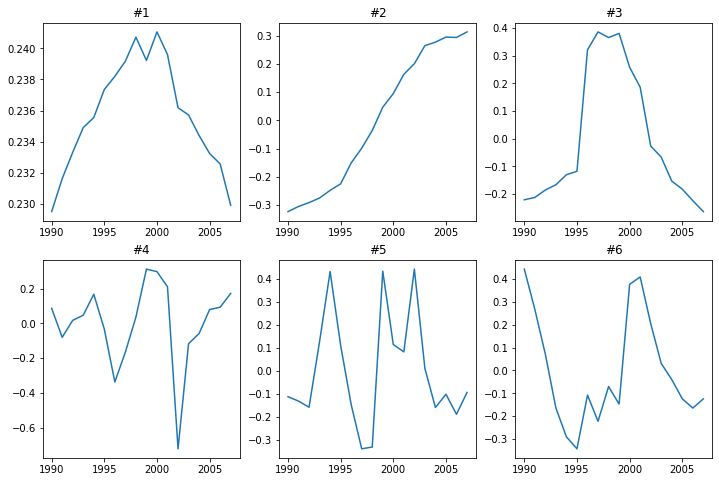

In [117]:
COUNT = 6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.plot(time,W.T[i], label=df_country)
    plt.title('#{}'.format(i+1))

### Question 3

1. Pick an interesting data sample (ie, data from a single country) and display it.[1] 

2. Next, show its incremental reconstruction using the first 1-6 components (again plotted as a time series in a 3 plots/row format).[1]

3. In addition, show another plot with the residual error of each reconstruction compared to the original sample and a title that states the RMSE of the reconstruction for each of the 6 components.[1]

**Subquestion 1**

[1.03110452 1.01641938 1.02196785 1.01942307 1.00947772 0.98629122
 1.12819983 1.07411977 1.0397738  0.98938988 0.84681087 0.72433088
 0.60775318 0.627344   0.51947036 0.45473638 0.38936941 0.33411829]
Afghanistan


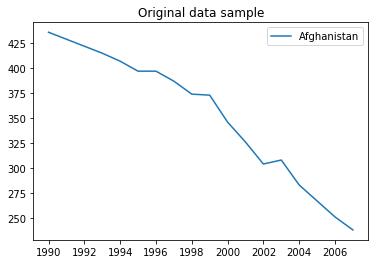

In [118]:
interested=0
df_country=df.iloc[:,0][interested]
time=np.asarray(column_names).astype(int)
#pop=np.asarray((df_data.iloc[interested,:]).astype(int))
pop_org=df_data.iloc[interested,:]
pop=df_std[interested,:]
print(pop)
print(df_country)
plt.plot(time,pop_org,label=df_country)
plt.title("Original data sample")
plt.legend()
plt.xticks(np.arange(min(time), max(time)+1, 2.0))
plt.show()       

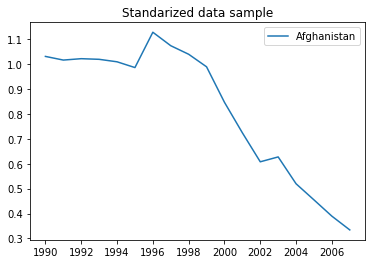

In [119]:
plt.plot(time,pop, label=df_country)
plt.legend()
plt.title("Standarized data sample")
plt.xticks(np.arange(min(time), max(time)+1, 2.0))
plt.show()

**Subquestion 2**

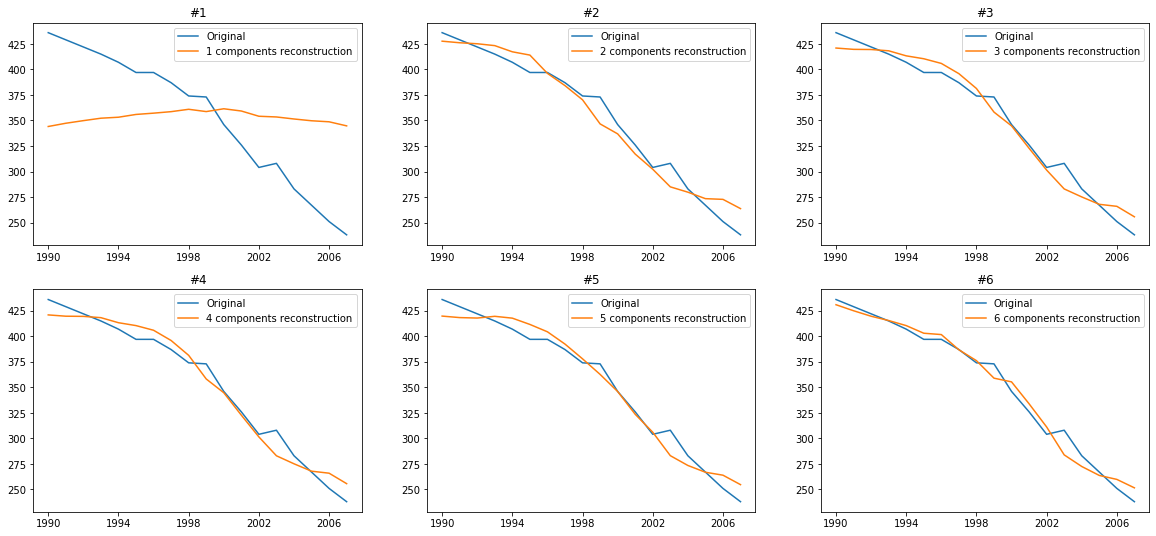

In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt
###incremental reconstruction plot
COUNT = 6 # count of first eigenVectors used to reconstruct the image
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(20, ROWS * 4.5))
#pop=df_std[interested]
residual=[]
rmse_list=[]

for numEvs in range (0, COUNT):
    P = project(eigenVectors[:, 0:numEvs+1], pop_org, 0)
    R = reconstruct(eigenVectors[:, 0:numEvs+1], P, 0)
    rmse = sqrt(mean_squared_error(pop_org, R))
    time=np.asarray(column_names).astype(int)
    #pop=np.asarray((df_data.iloc[interested,:]).astype(int)) 
    #print(P)
    #print(df_country)
    residual.append(pop_org-R)
    rmse_list.append(rmse)
    plt.subplot(ROWS, 3, numEvs+1)
    #plt.subplot(4,2,numEvs+2)
    plt.plot(time,pop_org, label="Original")
    plt.plot(time,R,label="{} components reconstruction".format(numEvs+1))
    plt.legend()
    plt.xticks(np.arange(min(time), max(time)+1, 4.0))
    plt.show
    plt.title('#{}'.format(numEvs+1))
#print(rmse_list)
    

        
    

**Subquestion 3**

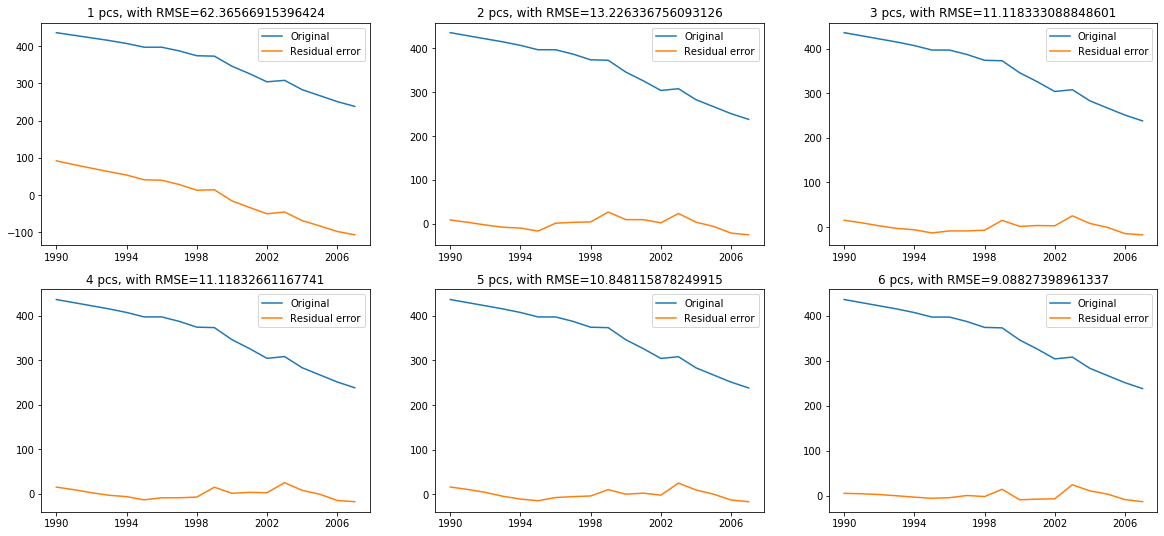

In [121]:

#print(rmse)
COUNT = 6 
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(20, ROWS * 4.5))
for numEvs in range (0, COUNT):
    #rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    plt.subplot(ROWS, 3, numEvs+1)
    plt.plot(time,pop_org,label="Original")
    plt.plot(time,residual[numEvs],label="Residual error")
    plt.legend()
    plt.xticks(np.arange(min(time), max(time)+1, 4.0))
    plt.show
    plt.title('{} pcs, with RMSE={}'.format(numEvs+1,rmse_list[numEvs]))
    #plt.title(rmse_list[numEvs])

### Question 4

1. Plot the eigenvalues of the first 15 (or more) principle components and choose a number k of principle components that you believe will allow you to reconstruct the data well.[1] **See below. So choose K=11. Reason stated in the next question.**
2. How many did you choose and why?[1] **See below**

**Subquestion 1**

In [122]:
#@title
'''COUNT = 15 # count of first eigenVectors used to reconstruct the image
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(8, ROWS * 1.1))
#pop=df_std[interested]


for numEvs in [COUNT]:
    P = project(eigenVectors[:, 0:numEvs], pop, 0)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, 0)
    time=np.asarray(column_names).astype(int)
    rmse_local = sqrt(mean_squared_error(pop, R))
    residual_local=pop-R
    plt.plot(time,pop)
    plt.plot(time,R,label=(numEvs,'components reconstruction'))
    plt.legend()
    plt.xticks(np.arange(min(time), max(time)+1, 4.0))
    plt.show
    plt.title('#{}'.format(numEvs))
#print("With RMSE=",rmse_list[COUNT-1])
print("With RMSE=",rmse_local)
'''




'COUNT = 15 # count of first eigenVectors used to reconstruct the image\nROWS = math.ceil(COUNT/3)\nfig = plt.figure(figsize=(8, ROWS * 1.1))\n#pop=df_std[interested]\n\n\nfor numEvs in [COUNT]:\n    P = project(eigenVectors[:, 0:numEvs], pop, 0)\n    R = reconstruct(eigenVectors[:, 0:numEvs], P, 0)\n    time=np.asarray(column_names).astype(int)\n    rmse_local = sqrt(mean_squared_error(pop, R))\n    residual_local=pop-R\n    plt.plot(time,pop)\n    plt.plot(time,R,label=(numEvs,\'components reconstruction\'))\n    plt.legend()\n    plt.xticks(np.arange(min(time), max(time)+1, 4.0))\n    plt.show\n    plt.title(\'#{}\'.format(numEvs))\n#print("With RMSE=",rmse_list[COUNT-1])\nprint("With RMSE=",rmse_local)\n'

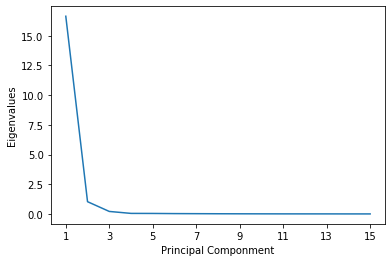

In [123]:
pc_num=list(range(1,16))
plt.plot(pc_num,eigenValues[0:15])
plt.xlabel("Principal Componment")
plt.ylabel("Eigenvalues")
plt.xticks(np.arange(1, 16, 2.0))
plt.show()

**Subquestion 2**

In [124]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 92.03977111,  97.74467407,  98.90913378,  99.16258184,
        99.39246981,  99.55243536,  99.6751039 ,  99.7639778 ,
        99.82947975,  99.87721587,  99.91009571,  99.93752202,
        99.96140791,  99.97587443,  99.98672718,  99.99368582,
        99.99782377, 100.        ])

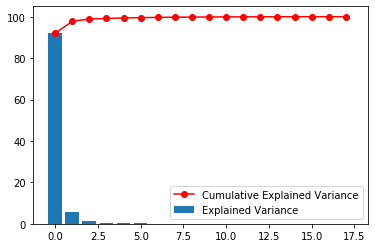

In [125]:
plt.bar(range(18), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.xticks()
plt.show()

In [126]:
def k_pc(eigenValues, variance=.999):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            print(idx+1,"of priciple components can allow me to reconstruct the data since it is above 99.9% of cumulative variance already.")
            break
            
k_pc(eigenValues, variance=.999)

11 of priciple components can allow me to reconstruct the data since it is above 99.9% of cumulative variance already.


**Based on different standard and criteria, we may have different accuary requirement as defining what is a "good" reconstruction.If let's say the "good" reconstruction can be obtained when cumulative variance is higher than 99.9%. In this case, I have shown the graph and calcuation around it as shown in the above code. Therefore, I will choose K=11 as the number of principle components to reconstruct the data well.**

### Question 5

1. Compute the mean (M) and standard deviation (StD) of the interesting data sample selected in question 3.[0.5]

Random walk refers to any process in which there is no observable pattern or trend; that is, where the movements of an object, or the values taken by a certain variable, are completely random. Each "step" taken in a random walk can be sampled from a distribution. You may find the methods numpy.random.normal, numpy.cumsum useful for creating random walks. 

2. Make 6 time series of random walks of the same length as the time series in this dataset. Random walks created should have the same mean M and standard deviation StD as the data sample choosen. Each next step in the random walk is some Uniform or Gaussian perturbation from the previous sample.[1]
    - Show for a sample random walk it's mean and standard deviation matches M and StD respectively.
    - Visualize these 6 time series in a 2 x 3 plot.


3. Show the reconstruction of each time series using k principle components overlayed on the original random walk. Plot this in a 2 x 3 plot and report the RMSE of the reconstruction in the title of each plot.[1]
4. Compare these RMSE values with the ones you got for question 3.[1]

**Subquestion 1:**

In [127]:
M=np.mean(pop_org)
StD=np.std(pop_org)
print("Meah=",M,"and standard deviation=",StD)

Meah= 353.3333333333333 and standard deviation= 62.8852570604236


**Subquestion 2:**

The mean of cumulative sum after scaling is 353.3333333333333 , and standard deviation is 62.885257060423605 for # 1 time series, which correspond to the desired mean and std.
The mean of cumulative sum after scaling is 353.3333333333333 , and standard deviation is 62.885257060423584 for # 2 time series, which correspond to the desired mean and std.
The mean of cumulative sum after scaling is 353.33333333333326 , and standard deviation is 62.88525706042359 for # 3 time series, which correspond to the desired mean and std.
The mean of cumulative sum after scaling is 353.3333333333333 , and standard deviation is 62.885257060423605 for # 4 time series, which correspond to the desired mean and std.
The mean of cumulative sum after scaling is 353.3333333333333 , and standard deviation is 62.885257060423584 for # 5 time series, which correspond to the desired mean and std.
The mean of cumulative sum after scaling is 353.3333333333333 , and standard deviation is 62.885257060423605 for # 6 tim

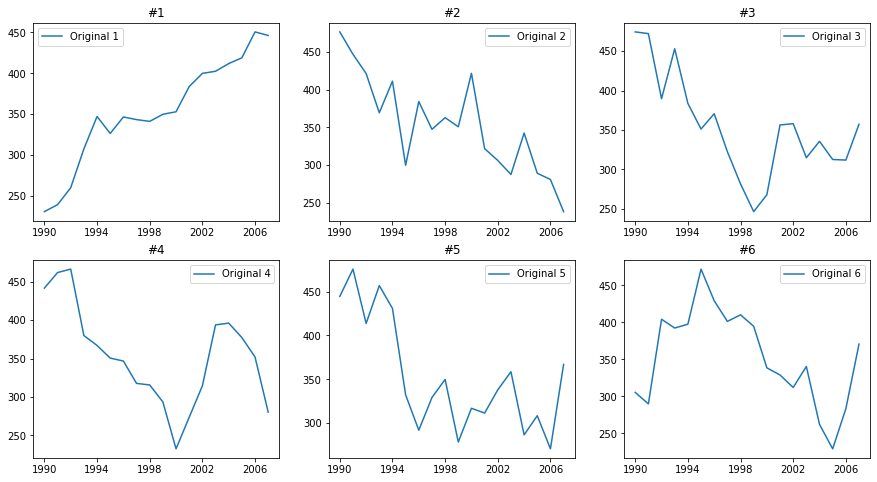

In [128]:
def scaling (ary,curt_mean,curt_std):
  c=M+(ary-curt_mean)*(StD/curt_std) 
  new_mean=np.mean(c)
  new_std=np.std(c)
  print('The mean of cumulative sum after scaling is',new_mean, ', and standard deviation is',new_std,"for #",i+1,"time series, which correspond to the desired mean and std.")
  return c
rand_walk=[]

COUNT=6
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(15, ROWS * 4))
for i in range(6):
  np.random.seed(i)
  rand=np.random.normal(loc=0.0, scale=1.0, size=18)
  #print(rand)
  cum_rand=np.cumsum(rand)
  #print(cum_rand)
  curt_mean=np.mean(cum_rand)
  curt_std=np.std(cum_rand)
  #print('Before scaling, mean and std for cumulative sum are',curt_mean,curt_std,"respectively.")
  cum_rand_scale=scaling(cum_rand,curt_mean,curt_std)
  rand_walk.append(cum_rand_scale)
  #print(np.std(cum_rand_scale))
  #print(cum_rand_scale)
  plt.subplot(ROWS, 3, i+1)
  plt.plot(time,cum_rand_scale,label="Original {}".format(i+1))
  
  plt.legend()
  plt.xticks(np.arange(min(time), max(time)+1, 4.0))
  plt.show
  #plt.title('{} pcs, with RMSE={}'.format(numEvs+1,rmse_list[numEvs]))
  #plt.title(rmse_list[numEvs])
  plt.title('#{}'.format(i+1))
  #print(cum_rand_scale)
#print(rand_walk[0])  



In [129]:
#@title
#np.random.seed(0)
#rand=np.random.normal(loc=0.0, scale=1.0, size=18)
#print(rand)
#cum_rand=np.cumsum(rand)
#tryout = StandardScaler().fit_transform(cum_rand.reshape(-1,1))
#try_new=tryout*StD+M
#print(try_new)

#b=np.array([1,-1,2,-2,3,-3])
#print(np.mean(b),np.std(b))
#x=StD*b+M
#print(np.mean(x),np.std(x))

#b=np.array([1,-1,2,-2,3,-3])
#M2=np.mean(b)
#StD2=np.std(b)
#print(M2,StD2)
#c=M+(b-M2)*(StD/StD2)
#print(np.mean(c),np.std(c))
{
    "tags": [
        "hide_input",
        "hide_output"
    ]
}

{'tags': ['hide_input', 'hide_output']}

**Subquestion 3:**

Use K=11 calculated from last question.


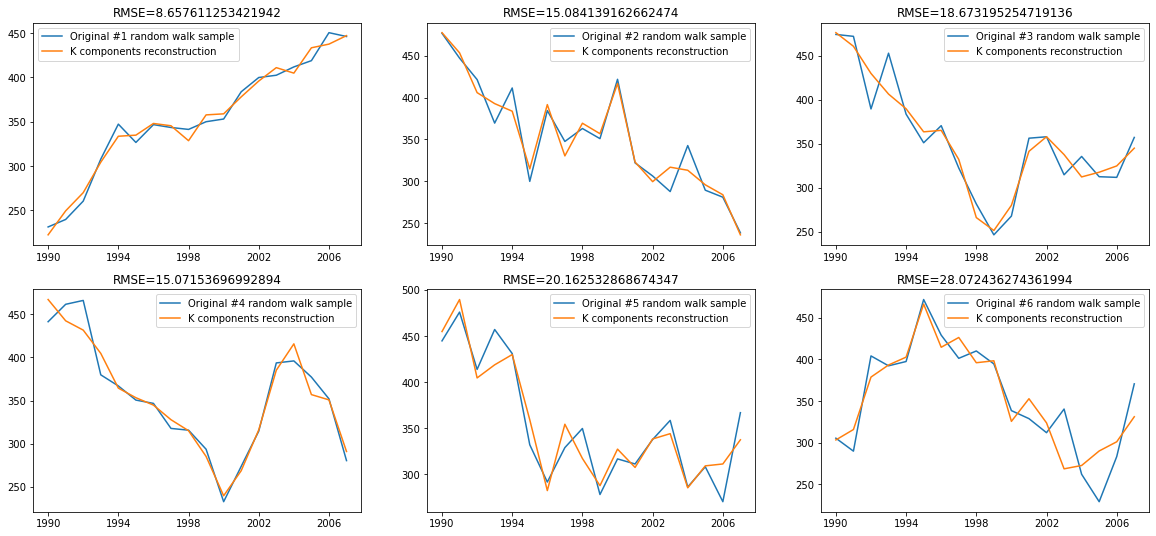

In [130]:
print("Use K=11 calculated from last question.")
COUNT = 6 # count of first eigenVectors used to reconstruct the image
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(20, ROWS * 4.5))
#pop=df_std[interested]
#residual=[]
rmse_list=[]
k=11

for i in range (0, COUNT):
    P = project(eigenVectors[:,0:k], rand_walk[i], 0)
    R = reconstruct(eigenVectors[:, 0:k], P, 0)
    rmse = sqrt(mean_squared_error(rand_walk[i], R))
    time=np.asarray(column_names).astype(int)
    #pop=np.asarray((df_data.iloc[interested,:]).astype(int)) 
    #print(P)
    #print(df_country)
    #residual.append(pop_org-R)
    rmse_list.append(rmse)
    plt.subplot(ROWS, 3, i+1)
    #plt.subplot(4,2,numEvs+2)
    plt.plot(time,rand_walk[i], label='Original #{} random walk sample'.format(i+1))
    
    plt.plot(time,R,label='K components reconstruction')
    plt.legend()
    plt.xticks(np.arange(min(time), max(time)+1, 4.0))
    plt.show
    plt.title('RMSE={}'.format(rmse_list[i]))

**Subquestion 4:**

With RMSE=3.4810534476346215 from question 3


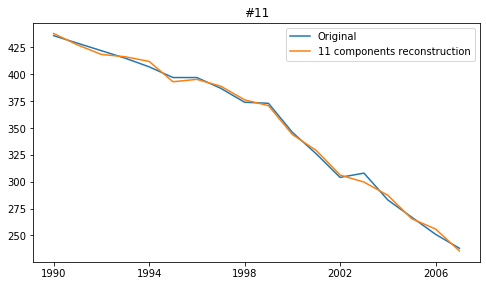

In [131]:
COUNT = 11 # count of first eigenVectors used to reconstruct the image
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(8, ROWS * 1.1))
#pop=df_std[interested]


for numEvs in [COUNT]:
    P = project(eigenVectors[:, 0:numEvs], pop_org, 0)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, 0)
    time=np.asarray(column_names).astype(int)
    rmse_local = sqrt(mean_squared_error(pop_org, R))
    residual_local=pop_org-R
    plt.plot(time,pop_org,label="Original")
    plt.plot(time,R,label='{} components reconstruction'.format(numEvs))
    plt.legend()
    plt.xticks(np.arange(min(time), max(time)+1, 4.0))
    plt.show
    plt.title('#{}'.format(numEvs))
#print("With RMSE=",rmse_list[COUNT-1])
print("With RMSE={} from question 3".format(rmse_local))

**The RMSEs that derived from reconstructing of random walk samples are higher than the one using for reconstructing of original data because those random walks generated are less similar to the original TB prevalence data.**

### Question 6

Explain how could you use PCA to do anomaly detection.[1]

**We use our original data after normalization to calculate our eigenvalues and eigenvectors. If we have another data of interest to be predict or reconstruct by projecting onto our eigenvectos, we can look at RMSE comparinng to the corresponding rmse for reconstructing the original data with the same principal components. Let's say we have RMSE=5 in average with K=10 for constructing specific original sample, whereas we obtain RMSE=100 with the same K when predicting the new data sample. That new data sample might be an anomaly. To be noted, the cutoff value has to be determined in advance.**


## References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Eigenfaces:
1. Snippets from: https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb
2. https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

Author: Parth Jaggi